In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
us = pd.read_csv('https://raw.githubusercontent.com/nmonozon/modeling-covid-19/main/Datasets/covid-19-states.csv')

In [3]:
us.head()

,date,day,state,fips,cases,deaths
0,2020-01-26,1,Arizona,4,1,0
1,2020-01-26,1,California,6,2,0
2,2020-01-26,1,Illinois,17,1,0
3,2020-01-26,1,Washington,53,1,0
4,2020-01-27,2,Arizona,4,1,0


In [4]:
tx = pd.DataFrame(us.loc[us['state'] == 'Texas'])

In [5]:
tx.reset_index(drop = True)

,date,day,state,fips,cases,deaths
0,2020-02-12,18,Texas,48,1,0
1,2020-02-13,19,Texas,48,2,0
2,2020-02-14,20,Texas,48,2,0
3,2020-02-15,21,Texas,48,2,0
4,2020-02-16,22,Texas,48,2,0
...,...,...,...,...,...,...
737,2022-02-18,755,Texas,48,6514527,83591
738,2022-02-19,756,Texas,48,6522401,83782
739,2022-02-20,757,Texas,48,6523978,83842
740,2022-02-21,758,Texas,48,6528752,83883


In [6]:
# from collections import UserDict
# subsetting data

# dates
alpha_date = tx.index[tx["date"] == '2020-11-30'].tolist()[0]
delta_date = tx.index[tx["date"] == '2021-06-08'].tolist()[0]
omicron_date = tx.index[tx["date"] == '2021-12-02'].tolist()[0]

# original variant
og = tx.iloc[0:499] 
len(og) # 499 days

# delta
delta = tx.iloc[499:676]
len(delta) # 177 days

# omicron
omicron = tx.iloc[676:743]
len(omicron) # only 70 days

# alpha
alpha = tx.iloc[alpha_date:delta_date] 

In [7]:
# conversion to dates
tx['date'] = pd.to_datetime(tx['date'])
og['date'] = pd.to_datetime(og['date'])
alpha['date'] = pd.to_datetime(og['date'])
delta['date'] = pd.to_datetime(delta['date'])
omicron['date'] = pd.to_datetime(omicron['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

**GENERAL TOTALS**

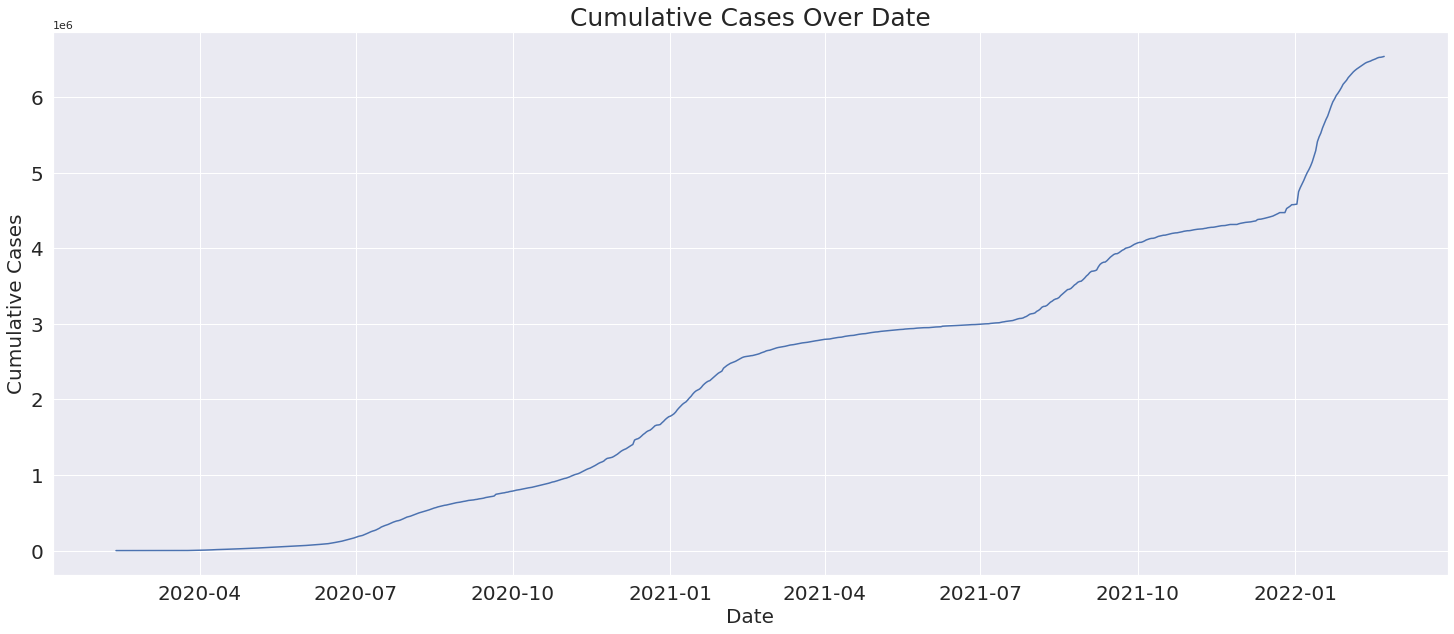

In [9]:
fig0 = sns.lineplot(x=tx['date'],y=tx['cases'])
fig0.set_xlabel("Date",fontsize=20)
fig0.set_ylabel("Cumulative Cases",fontsize = 20)
fig0.set_title("Cumulative Cases Over Date",fontsize = 25)
fig0.tick_params(labelsize=20)
sns.set(rc={'figure.figsize':(25,10)})

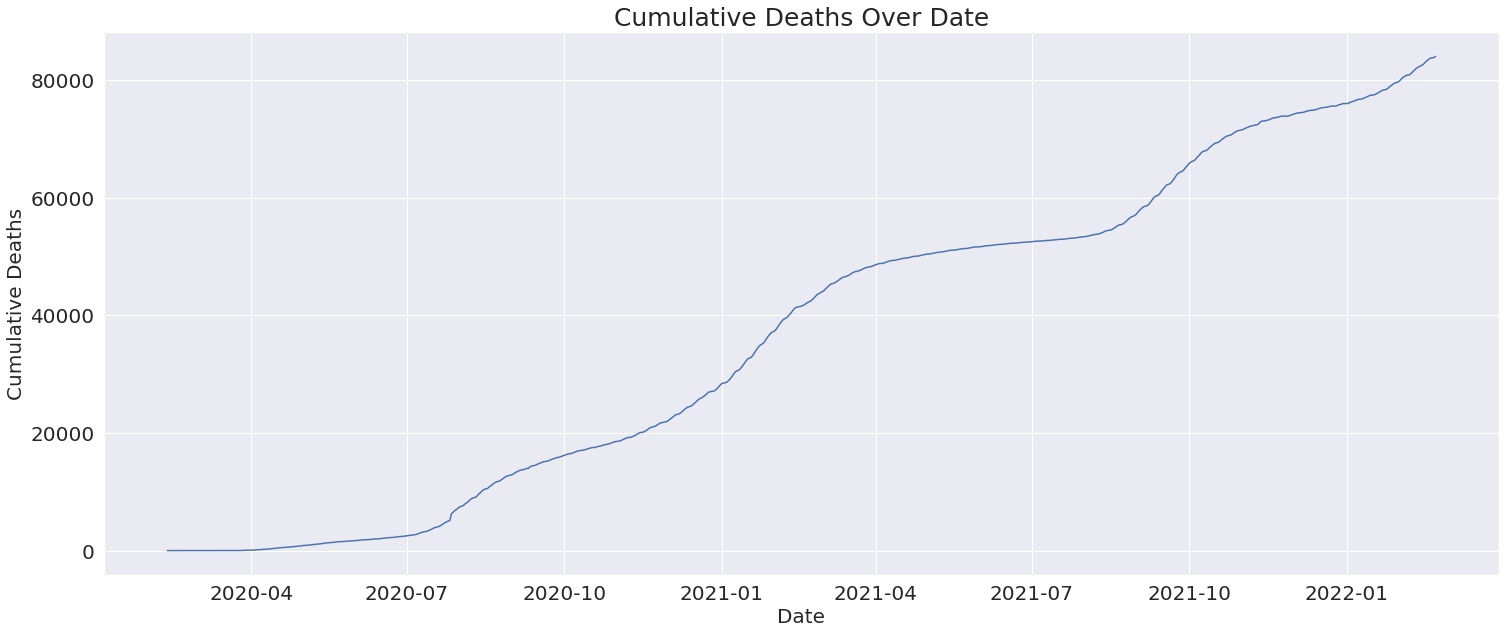

In [10]:
fig1 = sns.lineplot(x=tx['date'],y=tx['deaths'])
fig1.set_xlabel("Date",fontsize=20)
fig1.set_ylabel("Cumulative Deaths",fontsize = 20)
fig1.set_title("Cumulative Deaths Over Date",fontsize = 25)
fig1.tick_params(labelsize=20)
sns.set(rc={'figure.figsize':(25,10)})

Text(0.5, 0.98, 'Total Death and Case Count Over Time')

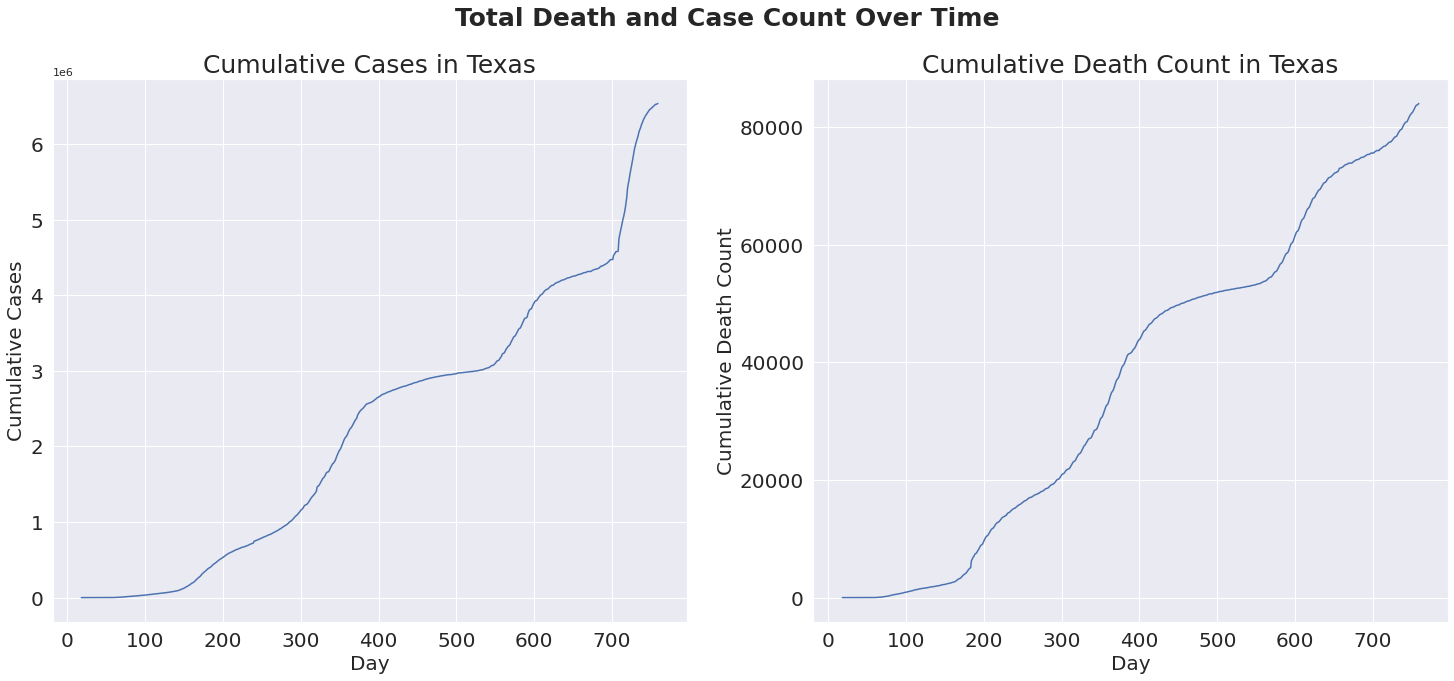

In [11]:
fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
sns.lineplot(x=tx['day'],y=tx['cases'], ax=axs[0])
axs[0].set_xlabel("Day", fontsize = 20)
axs[0].set_ylabel("Cumulative Cases", fontsize = 20)
axs[0].set_title("Cumulative Cases in Texas", fontsize = 25)
axs[0].tick_params(labelsize=20)
sns.set_style("darkgrid")

sns.lineplot(x=tx['day'],y=tx['deaths'], ax=axs[1])
axs[1].set_xlabel("Day", fontsize = 20)
axs[1].set_ylabel("Cumulative Death Count", fontsize = 20)
axs[1].set_title("Cumulative Death Count in Texas", fontsize = 25)
axs[1].tick_params(labelsize=20)

fig1.suptitle("Total Death and Case Count Over Time",fontsize = 25,fontweight="bold")

Text(0.5, 0.98, 'Comparing Weekly Cases and Weekly Deaths when each Variant hit')

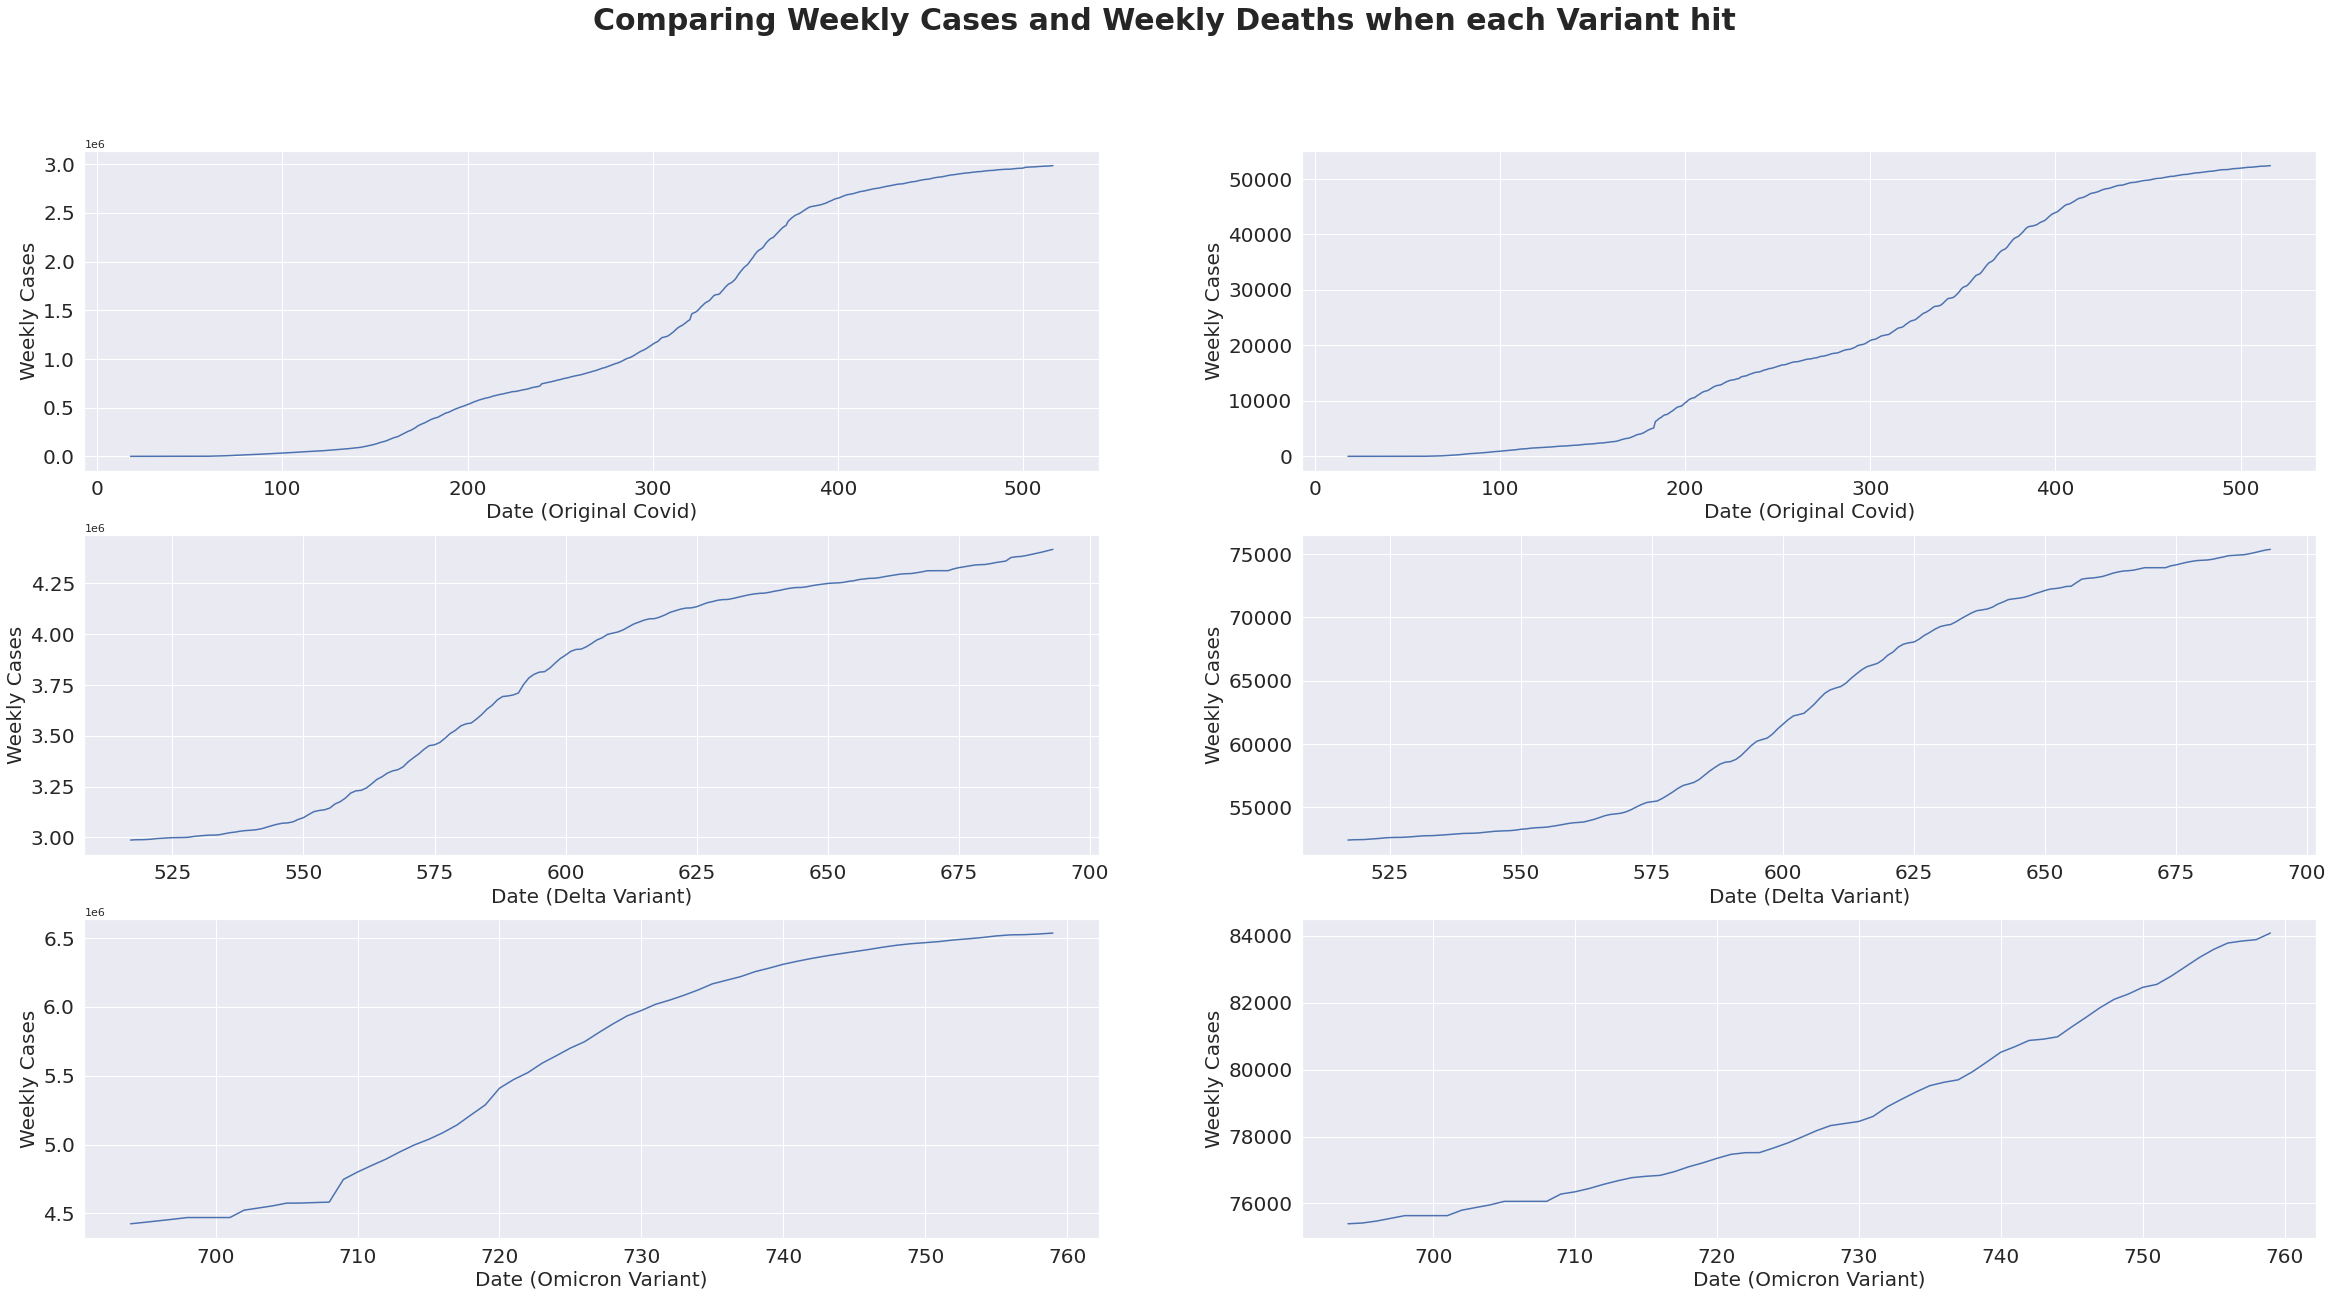

In [12]:
fig2, axs = plt.subplots(nrows=3, ncols=2, figsize=(40, 20))

sns.lineplot(x=og['day'],y=og['cases'], ax=axs[0,0])
axs[0,0].set_xlabel("Date (Original Covid)", fontsize = 20)
axs[0,0].set_ylabel("Weekly Cases", fontsize = 20)
axs[0,0].tick_params(labelsize=20)
sns.set_style("darkgrid")

sns.lineplot(x=delta['day'],y=delta['cases'], ax=axs[1,0])
axs[1,0].set_xlabel("Date (Delta Variant)", fontsize = 20)
axs[1,0].set_ylabel("Weekly Cases", fontsize = 20)
axs[1,0].tick_params(labelsize=20)

sns.lineplot(x=omicron['day'],y=omicron['cases'], ax=axs[2,0])
axs[2,0].set_xlabel("Date (Omicron Variant)", fontsize = 20)
axs[2,0].set_ylabel("Weekly Cases", fontsize = 20)
axs[2,0].tick_params(labelsize=20)


sns.lineplot(x=og['day'],y=og['deaths'], ax=axs[0,1])
axs[0,1].set_xlabel("Date (Original Covid)", fontsize = 20)
axs[0,1].set_ylabel("Weekly Cases", fontsize = 20)
axs[0,1].tick_params(labelsize=20)
sns.set_style("darkgrid")

sns.lineplot(x=delta['day'],y=delta['deaths'], ax=axs[1,1])
axs[1,1].set_xlabel("Date (Delta Variant)", fontsize = 20)
axs[1,1].set_ylabel("Weekly Cases", fontsize = 20)
axs[1,1].tick_params(labelsize=20)

sns.lineplot(x=omicron['day'],y=omicron['deaths'], ax=axs[2,1])
axs[2,1].set_xlabel("Date (Omicron Variant)", fontsize = 20)
axs[2,1].set_ylabel("Weekly Cases", fontsize = 20)
axs[2,1].tick_params(labelsize=20)

fig2.suptitle("Comparing Weekly Cases and Weekly Deaths when each Variant hit",fontsize = 30,fontweight="bold")

KEEP IN MIND THO COULD SEEM MISLEADING SINCE THE DATE/TIME FRAMES ARE GETTING SHORTER (499, 177, 70 days)



side note: can also break up to alpha since in graph 1 the huge rise near nov 2020 is due to alpha variant



**DEATH PER CASE**

In [13]:
tx["deaths_per_case"] = tx['deaths']/tx['cases']

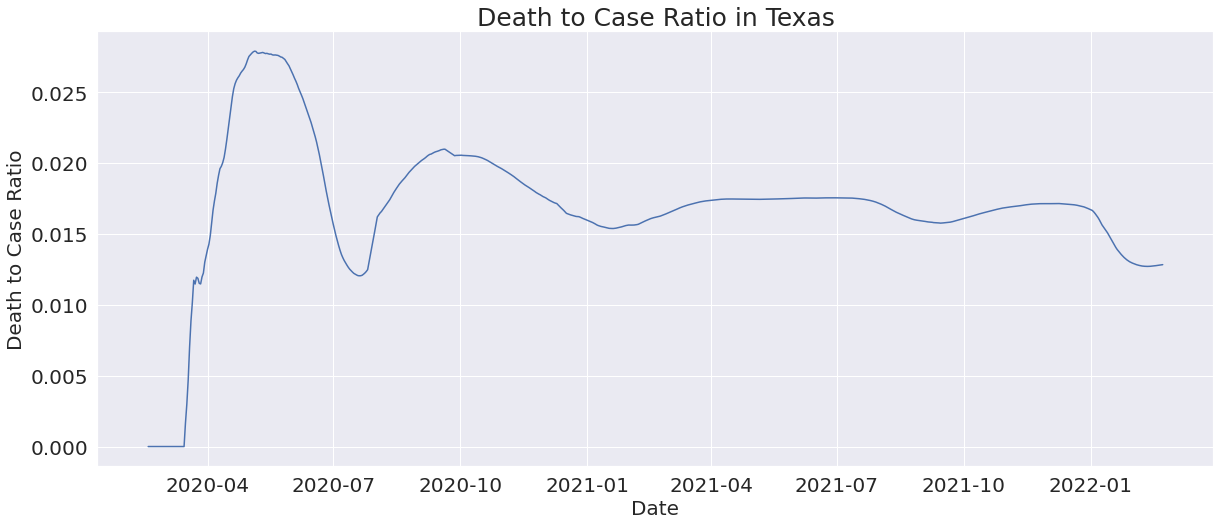

In [15]:
tx['7_day_dtc_ratio_avg'] = tx['deaths_per_case'].rolling(7).mean()
fig = sns.lineplot(x=tx['date'], y=tx['7_day_dtc_ratio_avg'])
fig.set_xlabel("Date", fontsize = 20)
fig.set_ylabel("Death to Case Ratio", fontsize = 20)
fig.set_title("Death to Case Ratio in Texas", fontsize = 25)
fig.tick_params(labelsize=20)
sns.set(rc = {'figure.figsize':(20,8)})

**NEW CASE COUNTS**

In [18]:
# new case counts
tx['new_cases'] = 0 
for i in range(1,len(tx)):
  tx['new_cases'].iloc[i] = tx['cases'].iloc[i] - tx['cases'].iloc[i-1]
  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


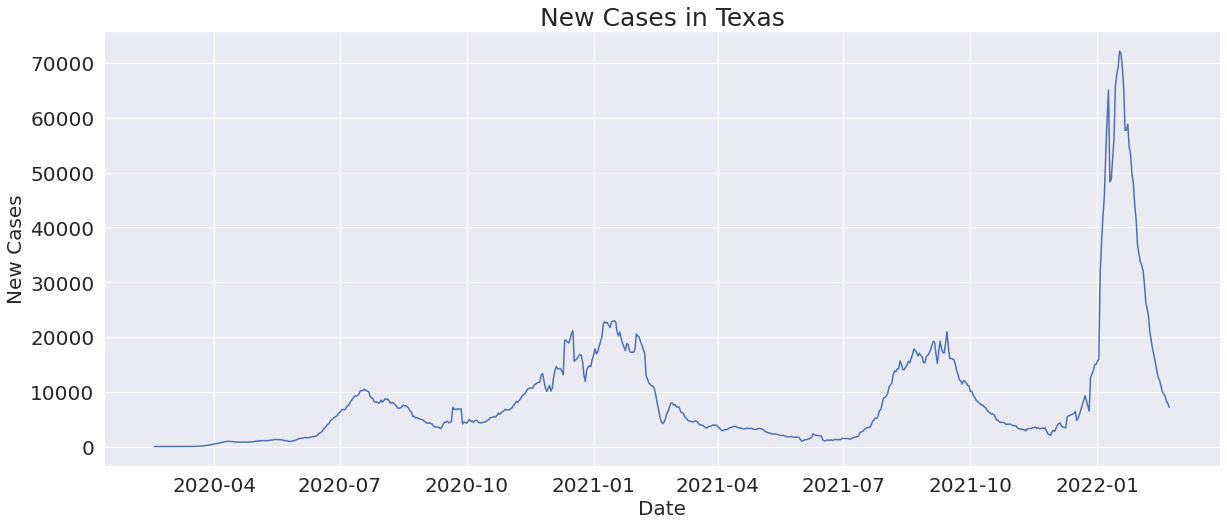

In [19]:
tx['7_day_case_avg'] = tx['new_cases'].rolling(7).mean()
plt.plot(tx['date'], tx['7_day_case_avg'])
plt.xlabel("Date", fontsize=20)
plt.ylabel("New Cases", fontsize=20)
plt.title("New Cases in Texas", fontsize=25)
plt.tick_params(labelsize=20)
sns.set(rc = {'figure.figsize':(20,8)})

In [ ]:
# new case counts

og_newcases = [0] * len(og)
for i in range(1, len(og) - 1):
  og_newcases[i] = og["cases"].iloc[i + 1] - og["cases"].iloc[i]

delta_newcases = [0] * len(delta)
for i in range(1, len(delta) - 1):
  delta_newcases[i] = delta["cases"].iloc[i + 1] - delta["cases"].iloc[i]

omicron_newcases = [0] * len(omicron)
for i in range(1, len(omicron) - 1):
  omicron_newcases[i] = omicron["cases"].iloc[i + 1] - omicron["cases"].iloc[i]

In [ ]:
# add as a column
og["new_cases"] = og_newcases
delta["new_cases"] = delta_newcases
omicron["new_cases"] = omicron_newcases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

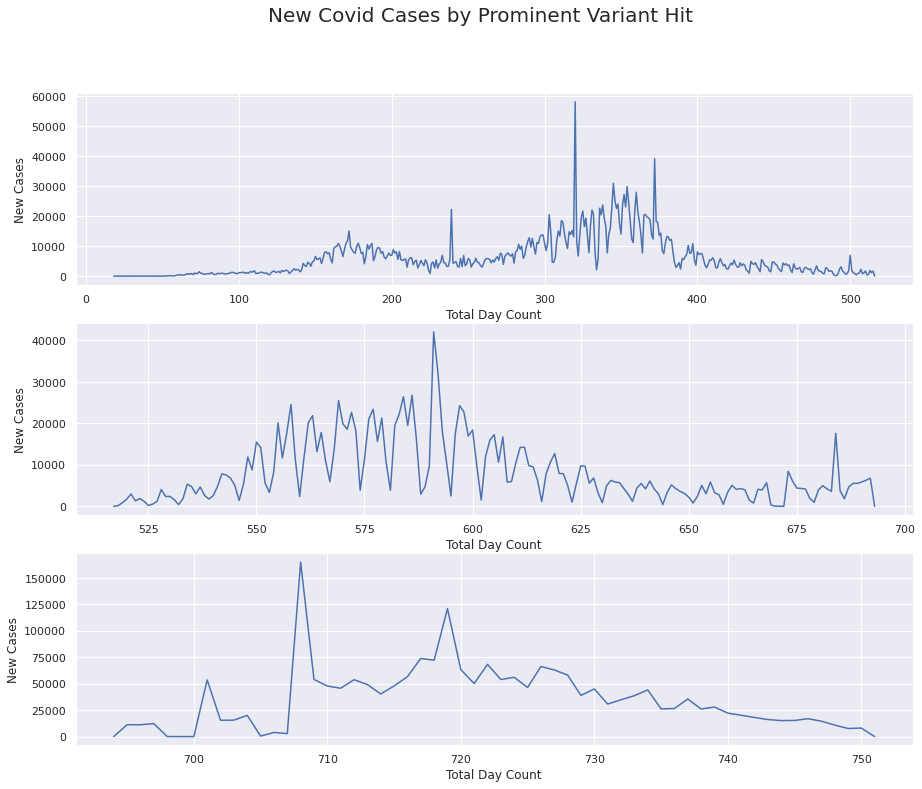

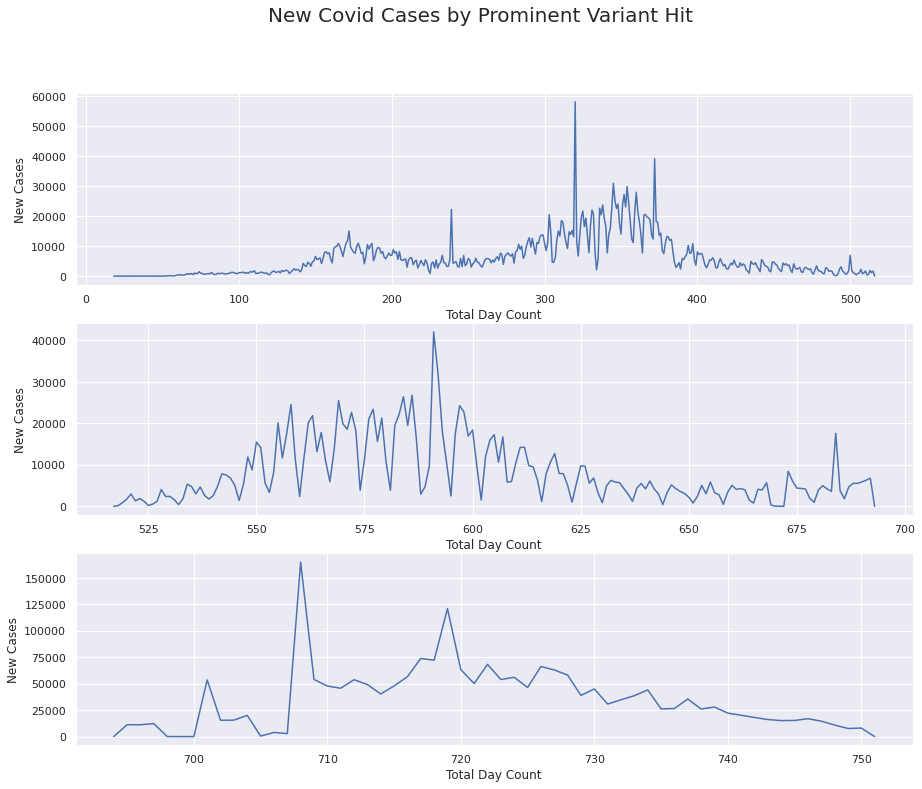

In [ ]:
fig, axs = plt.subplots(3, figsize = (15,12))
fig.suptitle("New Covid Cases by Prominent Variant Hit",fontsize = 20)
axs[0].plot(og["day"], og["new_cases"])
axs[1].plot(delta["day"], delta["new_cases"])
axs[2].plot(omicron["day"], omicron["new_cases"])
axs[0].set(xlabel = "Total Day Count",ylabel = "New Cases")
axs[1].set(xlabel = "Total Day Count",ylabel = "New Cases")
axs[2].set(xlabel = "Total Day Count",ylabel = "New Cases")
fig

In [ ]:
# rolling avg
og["rolling_newcase"] = og["new_cases"].rolling(window = 7).mean()
delta["rolling_newcase"] = delta["new_cases"].rolling(window = 7).mean()
omicron["rolling_newcase"] = omicron["new_cases"].rolling(window = 7).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

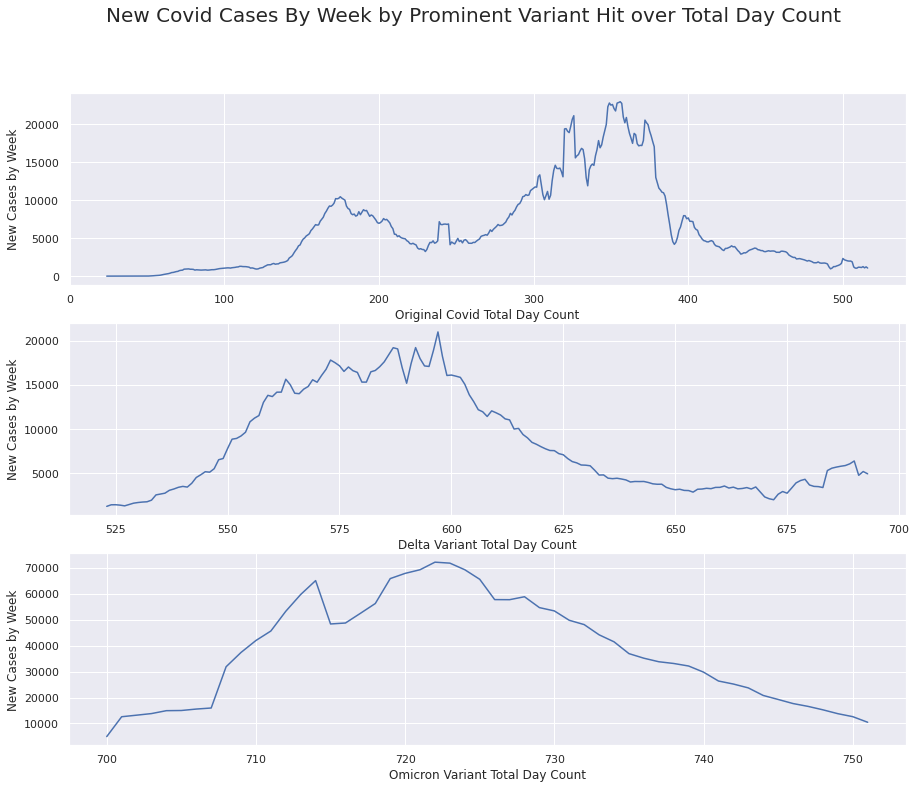

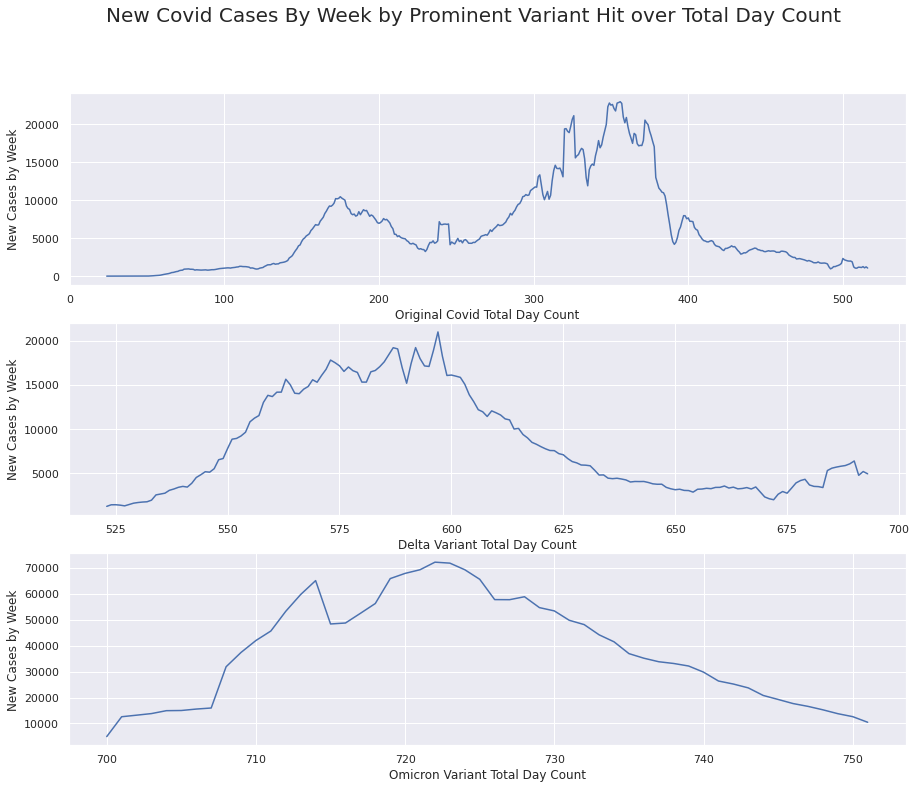

In [ ]:
# new covid cases by week (over total day count)
fig, axs = plt.subplots(3, figsize = (15,12))
fig.suptitle("New Covid Cases By Week by Prominent Variant Hit over Total Day Count",fontsize = 20)
axs[0].plot(og["day"], og["rolling_newcase"])
axs[1].plot(delta["day"], delta["rolling_newcase"])
axs[2].plot(omicron["day"], omicron["rolling_newcase"])
axs[0].set(xlabel = "Original Covid Total Day Count",ylabel = "New Cases by Week")
axs[1].set(xlabel = "Delta Variant Total Day Count",ylabel = "New Cases by Week")
axs[2].set(xlabel = "Omicron Variant Total Day Count",ylabel = "New Cases by Week")
fig

Seems like all three have a "peak" which afterwards the new case count slowly declines to a more common new case count

Hopefuly since the omicron graph is starting to decline, this means the peak of omicron has passed MAYBE?

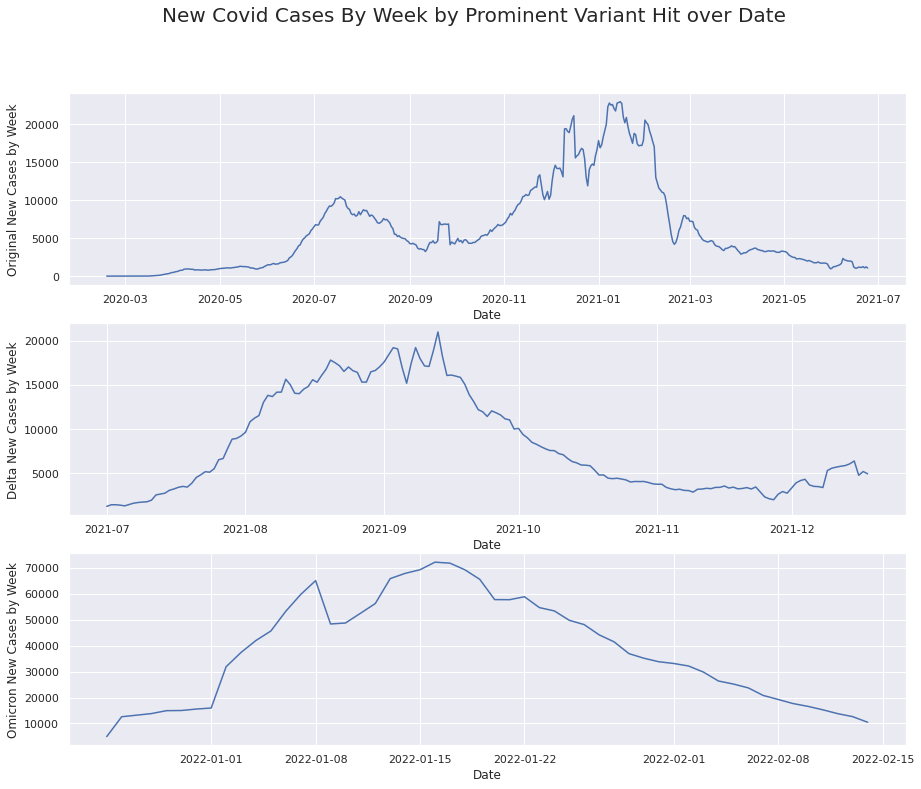

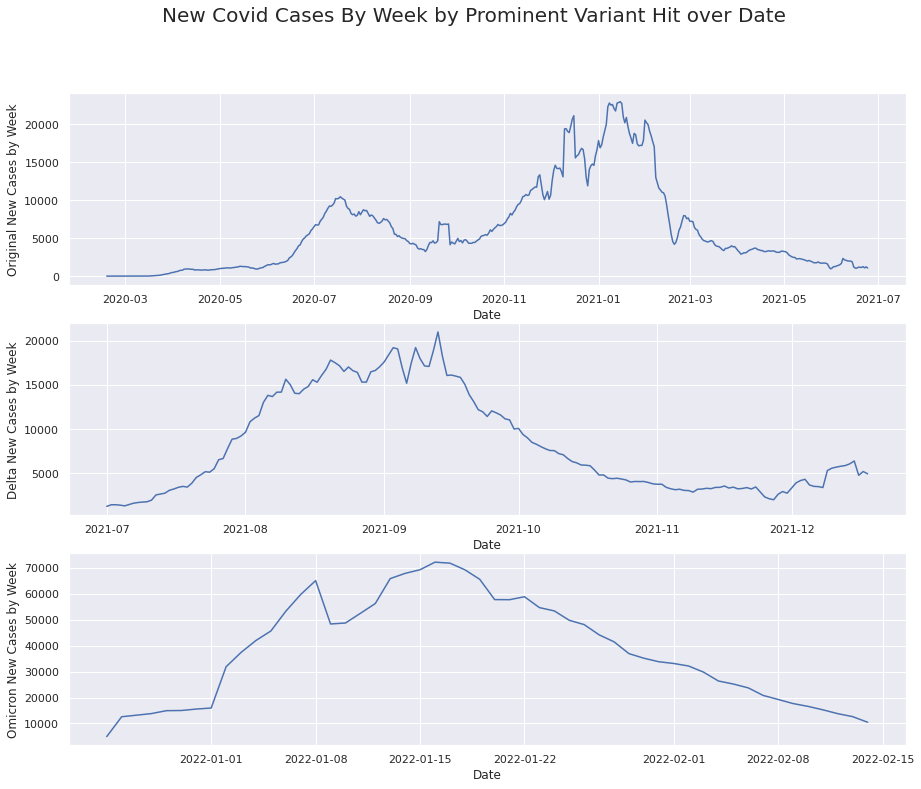

In [ ]:
# new covid cases by week (over date)
fig, axs = plt.subplots(3, figsize = (15,12))
fig.suptitle("New Covid Cases By Week by Prominent Variant Hit over Date",fontsize = 20)
axs[0].plot(og["date"], og["rolling_newcase"])
axs[1].plot(delta["date"], delta["rolling_newcase"])
axs[2].plot(omicron["date"], omicron["rolling_newcase"])
axs[0].set(xlabel = "Date",ylabel = "Original New Cases by Week")
axs[1].set(xlabel = "Date",ylabel = "Delta New Cases by Week")
axs[2].set(xlabel = "Date",ylabel = "Omicron New Cases by Week")
fig


**NEW DEATH COUNT**

In [20]:
# finding new deaths
tx['new_deaths'] = 0 
for i in range(1,len(tx)):
    tx['new_deaths'].iloc[i] = tx['deaths'].iloc[i] - tx['deaths'].iloc[i-1]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


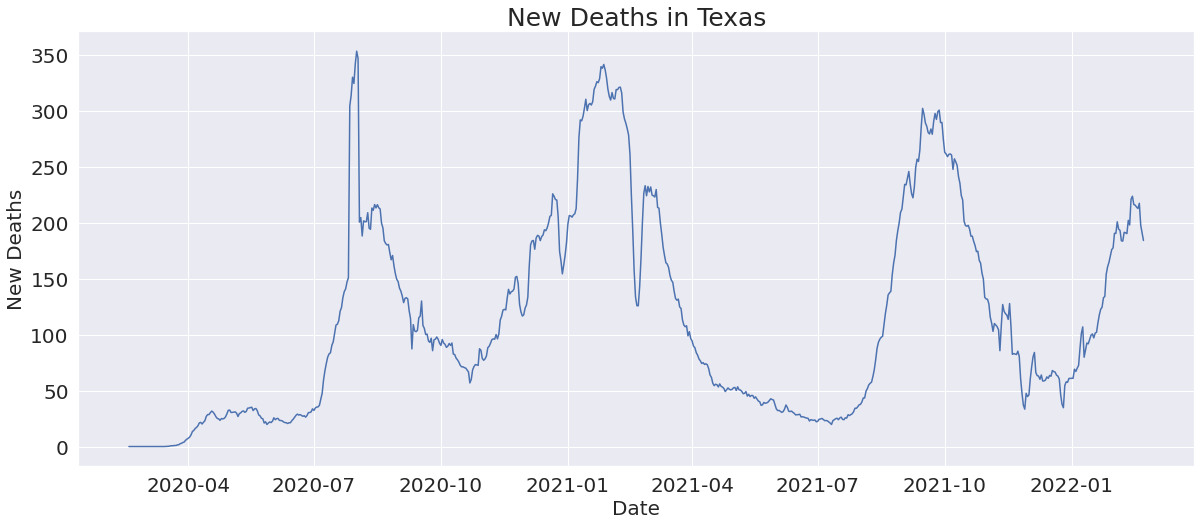

In [21]:
#New Deaths with 7 day average
tx['7_day_death_avg'] = tx['new_deaths'].rolling(7).mean()
plt.plot(tx['date'], tx['7_day_death_avg'])
plt.xlabel("Date", fontsize=20)
plt.ylabel("New Deaths", fontsize=20)
plt.title("New Deaths in Texas", fontsize=25)
plt.tick_params(labelsize=20)
sns.set(rc = {'figure.figsize':(20,8)})

In [ ]:
# finding new deaths
og_newdeaths = [0] * len(og)
for i in range(1, len(og) - 1):
  og_newdeaths[i] = og["deaths"].iloc[i + 1] - og["deaths"].iloc[i]

delta_newdeaths = [0] * len(delta)
for i in range(1, len(delta) - 1):
  delta_newdeaths[i] = delta["deaths"].iloc[i + 1] - delta["deaths"].iloc[i]

omicron_newdeaths = [0] * len(omicron)
for i in range(1, len(omicron) - 1):
  omicron_newdeaths[i] = omicron["deaths"].iloc[i + 1] - omicron["deaths"].iloc[i]

# add as a column
og["new_deaths"] = og_newdeaths
delta["new_deaths"] = delta_newdeaths
omicron["new_deaths"] = omicron_newdeaths

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

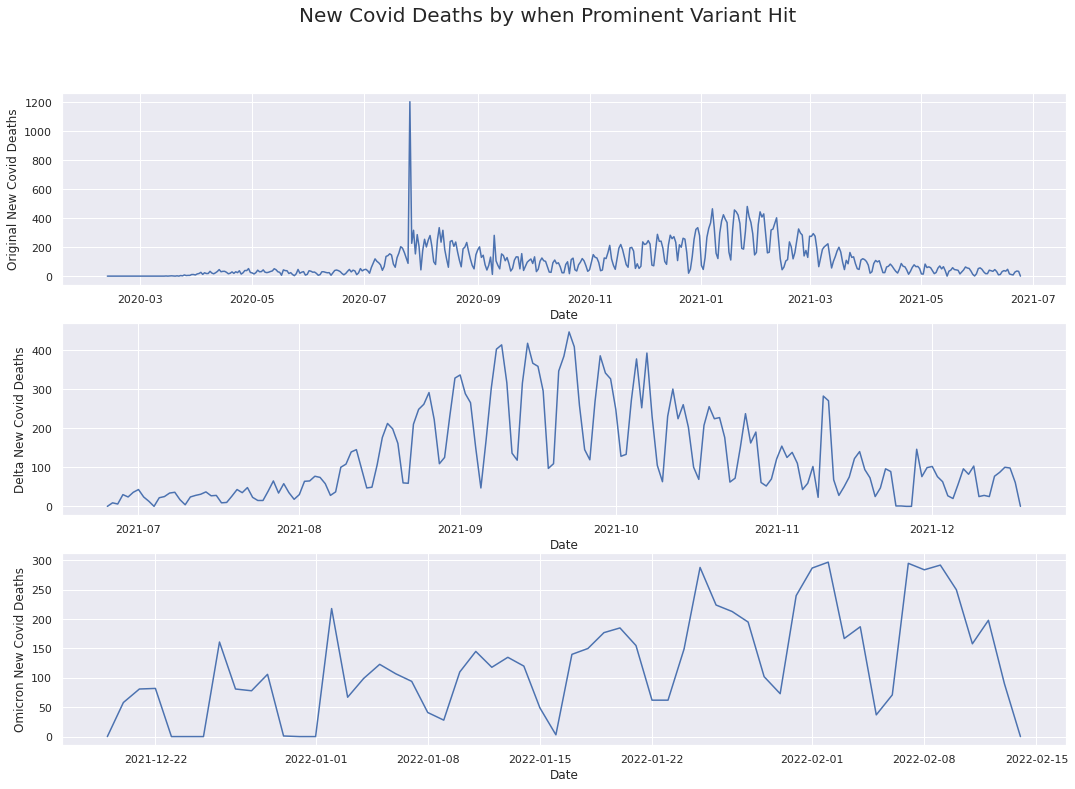

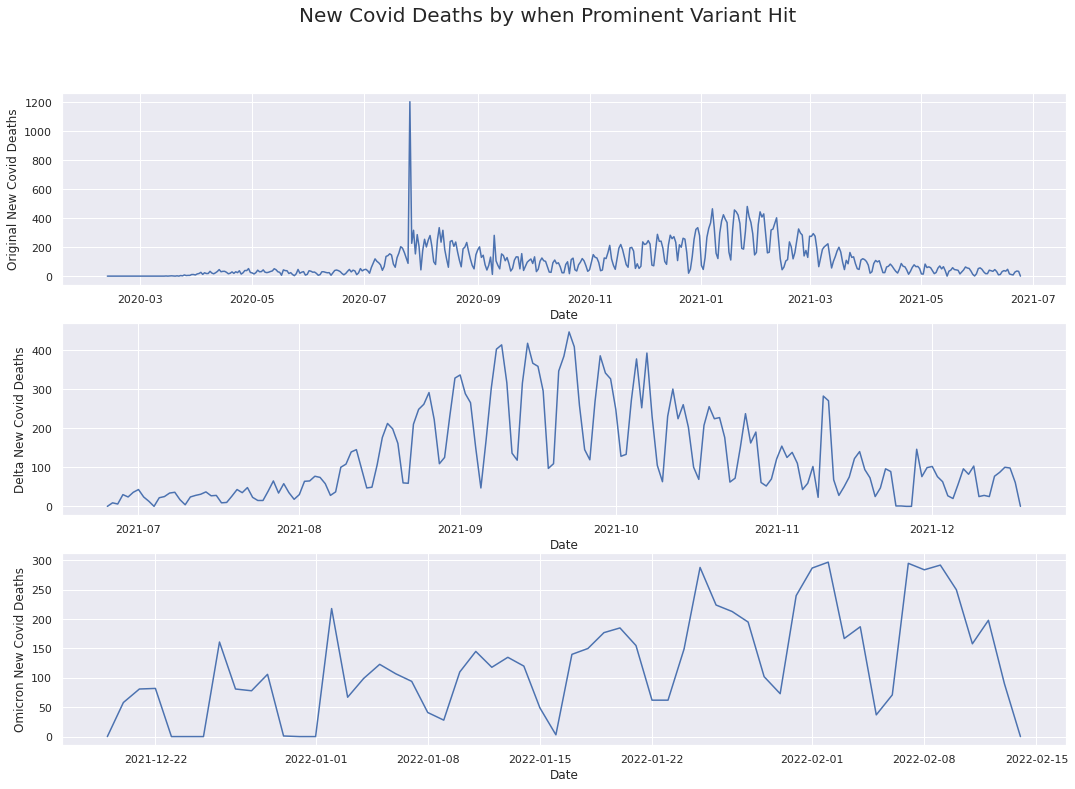

In [ ]:
fig, axs = plt.subplots(3, figsize = (18,12))
fig.suptitle("New Covid Deaths by when Prominent Variant Hit",fontsize = 20)
axs[0].plot(og["date"], og["new_deaths"])
axs[1].plot(delta["date"], delta["new_deaths"])
axs[2].plot(omicron["date"], omicron["new_deaths"])
axs[0].set(xlabel = "Date",ylabel = "Original New Covid Deaths")
axs[1].set(xlabel = "Date",ylabel = "Delta New Covid Deaths")
axs[2].set(xlabel = "Date",ylabel = "Omicron New Covid Deaths")
fig

In [ ]:
# rolling avg
og["rolling_newdeath"] = og["new_deaths"].rolling(window = 7).mean()
delta["rolling_newdeath"] = delta["new_deaths"].rolling(window = 7).mean()
omicron["rolling_newdeath"] = omicron["new_deaths"].rolling(window = 7).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

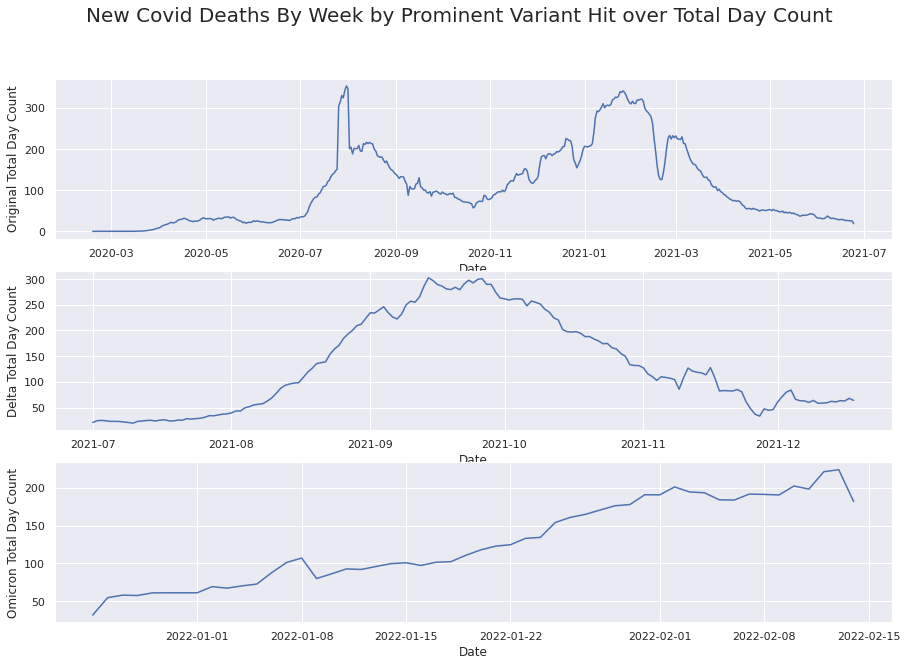

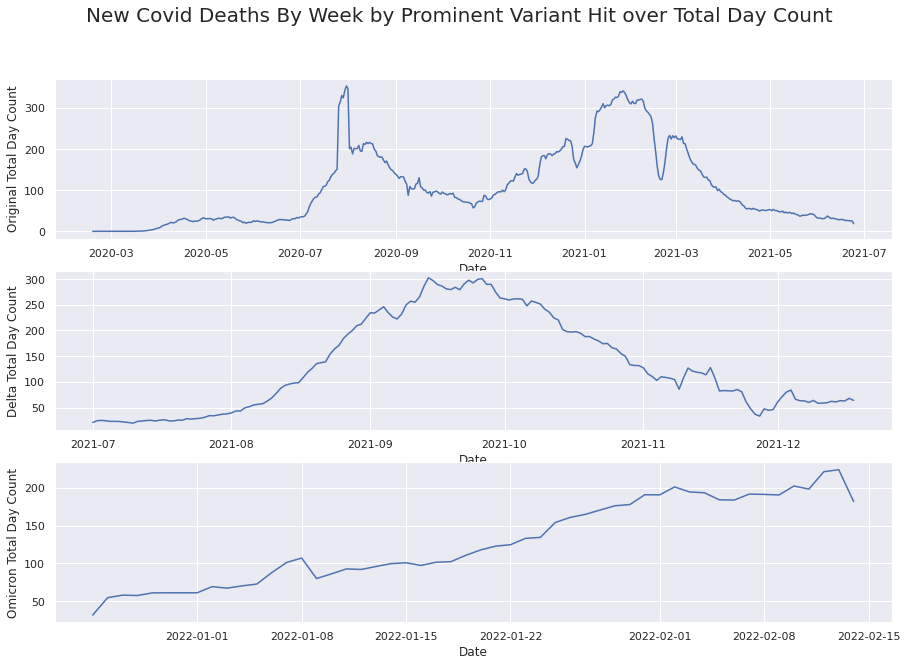

In [ ]:
# new covid cases by week (over total day count)
fig, axs = plt.subplots(3, figsize = (15,10))
fig.suptitle("New Covid Deaths By Week by Prominent Variant Hit over Total Day Count",fontsize = 20)
axs[0].plot(og["date"], og["rolling_newdeath"])
axs[1].plot(delta["date"], delta["rolling_newdeath"])
axs[2].plot(omicron["date"], omicron["rolling_newdeath"])
# set labels
axs[0].set(xlabel = "Date",ylabel = "Original Total Day Count")
axs[1].set(xlabel = "Date",ylabel = "Delta Total Day Count")
axs[2].set(xlabel = "Date",ylabel = "Omicron Total Day Count")

fig

seems similar to new cases with certain peaks and greadual declines

**SIDE-BY-SIDE NEW CASES AND NEW DEATHS**

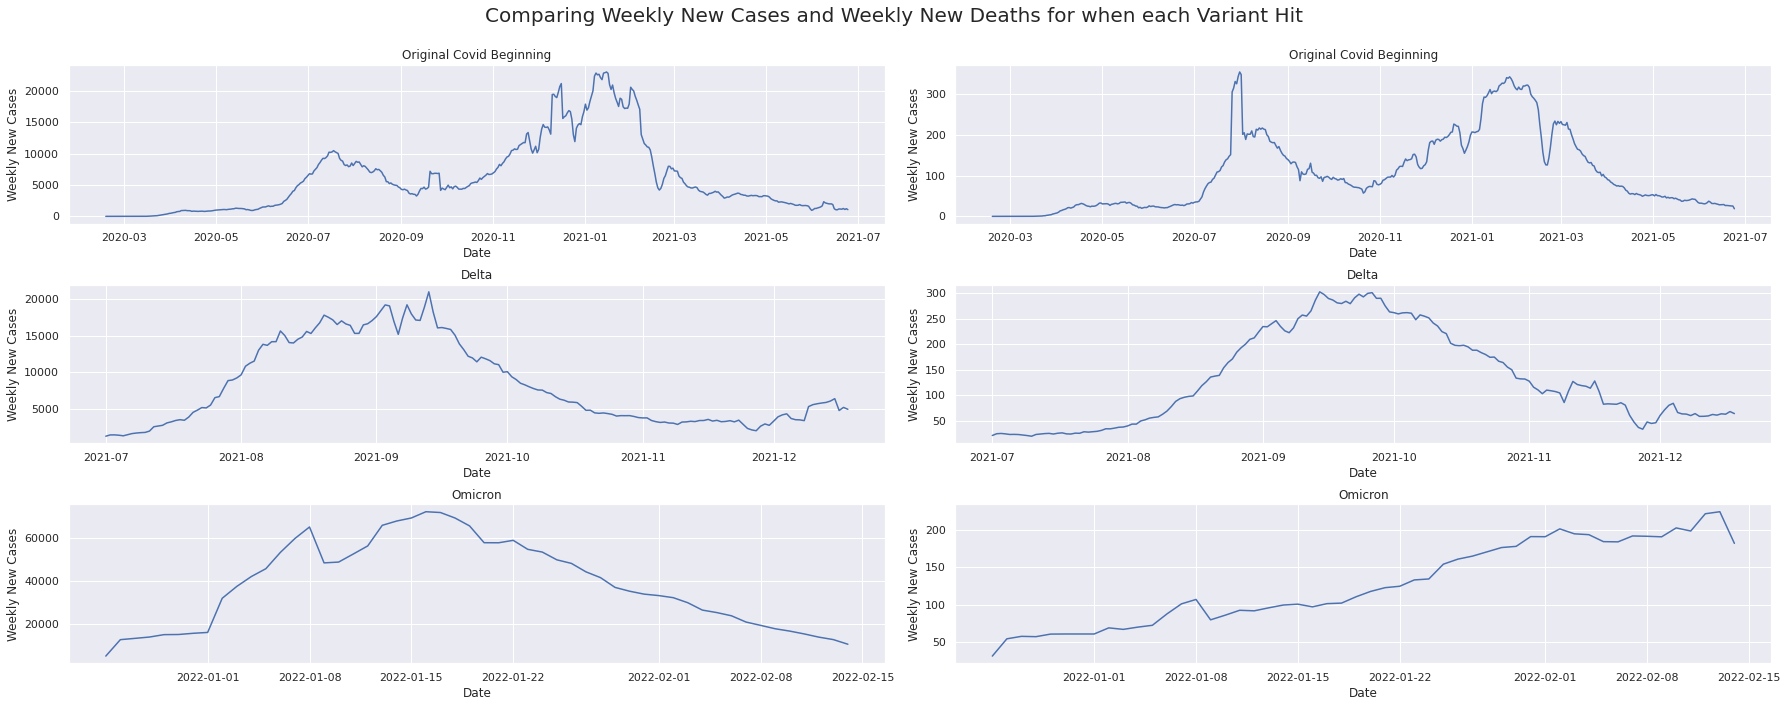

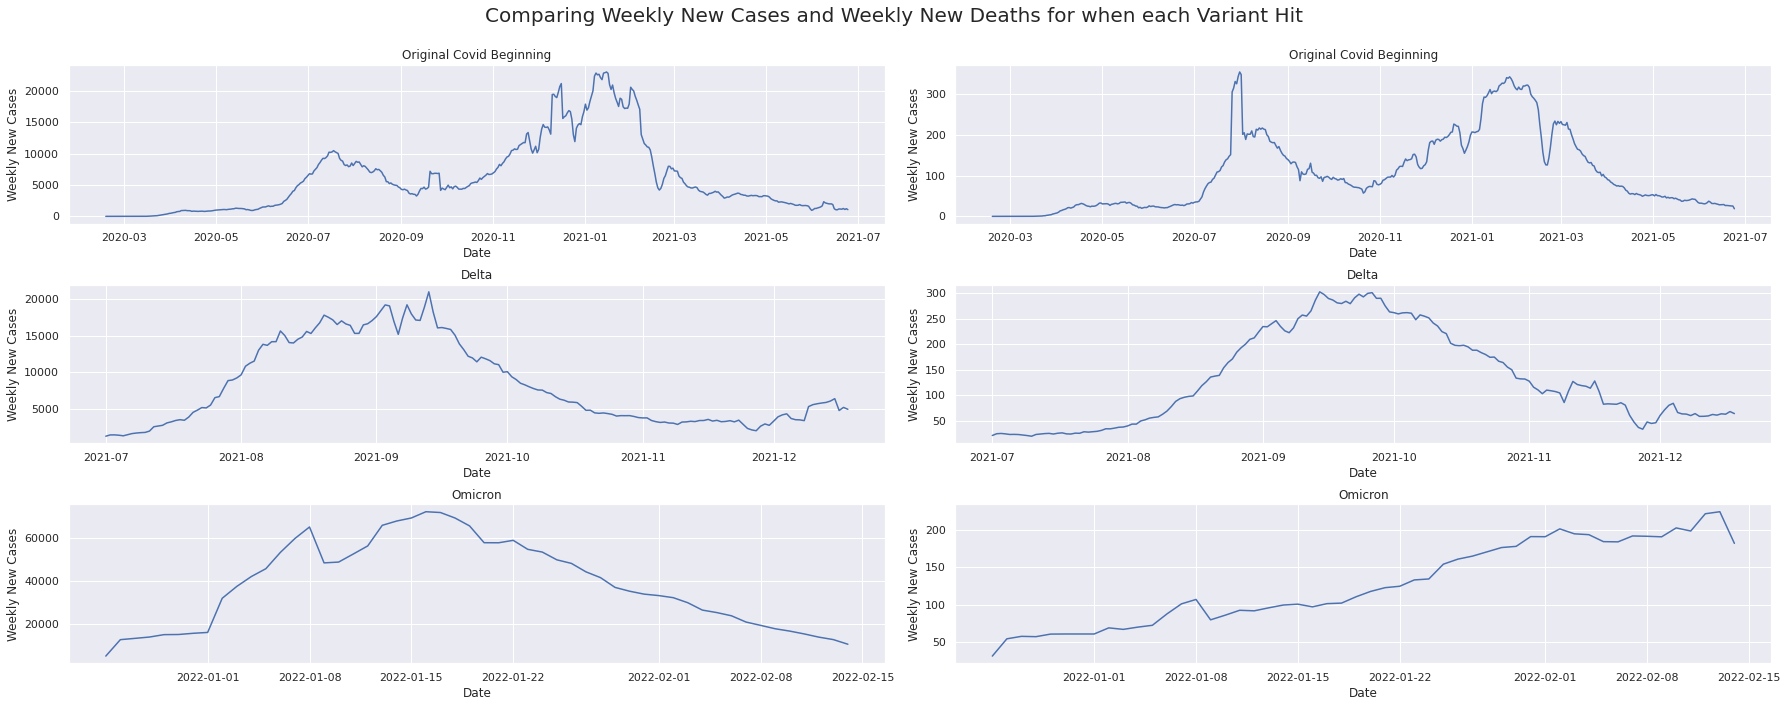

In [ ]:
# layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 10))
fig.tight_layout(pad=4.0)

# titles
fig.suptitle("Comparing Weekly New Cases and Weekly New Deaths for when each Variant Hit",fontsize = 20)
axs[0, 0].set_title("Original Covid Beginning")
axs[1, 0].set_title("Delta")
axs[2, 0].set_title("Omicron")
axs[0, 1].set_title("Original Covid Beginning")
axs[1, 1].set_title("Delta")
axs[2, 1].set_title("Omicron")

# set labels
axs[0,0].set(xlabel = "Date",ylabel = "Weekly New Cases")
axs[1,0].set(xlabel = "Date",ylabel = "Weekly New Cases")
axs[2,0].set(xlabel = "Date",ylabel = "Weekly New Cases")
axs[0,1].set(xlabel = "Date",ylabel = "Weekly New Cases")
axs[1,1].set(xlabel = "Date",ylabel = "Weekly New Cases")
axs[2,1].set(xlabel = "Date",ylabel = "Weekly New Cases")

# plotting lines
axs[0,0].plot(og["date"], og["rolling_newcase"])
axs[1,0].plot(delta["date"], delta["rolling_newcase"])
axs[2,0].plot(omicron["date"], omicron["rolling_newcase"])
axs[0,1].plot(og["date"], og["rolling_newdeath"])
axs[1,1].plot(delta["date"], delta["rolling_newdeath"])
axs[2,1].plot(omicron["date"], omicron["rolling_newdeath"])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig

pretty similar trend to how new cases look, but near the "beginning" of the new variants, more new deaths present (some bumps) compared to the slow increase of new cases


summary
- new cases: all hit a sort of "peak" at some pt bf slowly declining again (omicron seems to be past the peak but not enough time to really know)
- new deaths: similar to new cases trend but the "beginning" of a new variant sugguest greater new death counts